Simple proof of concept for resolve.

Test time taken to perform iterative search on progressively shorter
identifier strings to simulate resolution of an identifier with suffix
pass through.

In [4]:
import pymysql.cursors

def getLengthRange(identifier):
    return 12,156

def resolve(cn, identifier):
    min_len, max_len = getLengthRange(identifier)
    epos = max_len
    if epos > len(identifier):
        epos = len(identifier)
    sql = 'select identifier, target from ezidapp_searchidentifier where identifier=%s'
    with cn.cursor() as csr:
        while epos >= min_len:
            csr.execute(sql, identifier[:epos])
            res = csr.fetchone()
            if res is not None:
                return res
            epos = epos-1
    return None


In [5]:
import os
import time
import random
import json

def loadCreds():
    with open(os.path.expanduser("~/.local/opt/ezid/stagecreds.json")) as inf:
        return json.load(inf)

CHARS = list(map(chr, range(65, 91))) + list(map(chr, range(97, 123)))

def randomStr(n):
    s = ''
    for i in range(0,n):
        s += random.choice(CHARS)
    return s

creds = loadCreds()
cn = pymysql.connect(
    host='localhost',
    database='ezid',
    cursorclass=pymysql.cursors.DictCursor,
    user=creds['user'],
    password=creds['pass'])
creds = None

base_pid = "ark:/13030/qt8n91c81t"
pids = []
for i in range(50, 0, -1):
    pid = base_pid+randomStr(i)
    #print(pid)
    pids.append(pid)

results = []
for pid in pids:
    t0 = time.time()
    res = resolve(cn, pid)
    t1 = time.time()
    dt = (t1-t0)*1000.0
    results.append([len(pid), dt])
    print(f"{dt:0.2f}, {len(pid)}, {pid}")

5395.56, 71, ark:/13030/qt8n91c81tdynYZehqWuBUSmbBeOPohgkmojYnRgiUtPXUTplSPoSIzVrqyA
5277.89, 70, ark:/13030/qt8n91c81tjpdXtprLDNYiDkYNsFOQDjUyMEtKtVIlyUQKBadwsawBjAenN
5189.11, 69, ark:/13030/qt8n91c81tNTOcgUZVtAHzTTqcyvncaxDldbhzwpGwwHdgtOMneMmFHGJP
5092.45, 68, ark:/13030/qt8n91c81tBlrzGyBwiTjiFBRaYJwOGxbNrGyIQLgWyEkCOLLiUEvWLTM
4988.94, 67, ark:/13030/qt8n91c81tYAnxYVWyFmfWkGfcjyJcgAMOiREajwULFNJzdeqXEutIAA
4926.95, 66, ark:/13030/qt8n91c81thJCTFGaSKhUUgKyjjPmKiuKxwpvVHJEAWBtirgOCvJFUo
4768.23, 65, ark:/13030/qt8n91c81tWMbtzrooBYszXEuXyhzkbXPWpfnQpKaiQCvpmWYCsWZl
4698.27, 64, ark:/13030/qt8n91c81tsYbtCdIjsUttmwfzXbgwJrFieMUlrMPwCwNDaZlFoPU
4599.76, 63, ark:/13030/qt8n91c81tgCkdhVmoGtJICYWppGcQsjdaulsEaEBpDZUqMsXeDy
4552.97, 62, ark:/13030/qt8n91c81tpQcOpAPOtFWgIFThobzpafSYBNMKLaJZvbNQwunKN
4382.15, 61, ark:/13030/qt8n91c81tpxSFxRWDjhuHtjlAlFOnmCVNmpfeakDdoIAfjDDM
4274.59, 60, ark:/13030/qt8n91c81tBPvyGwGVrtgXFWztreDgrRsczGYwvoRvnvGajcg
4146.57, 59, ark:/13030/qt8n91c81tSLSHJwFuLYTt

Not surprising really - slow and linear. Might get some better performance with
a user defined procedure in MySQL.

/Users/vieglais/.virtualenvs/ezid3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


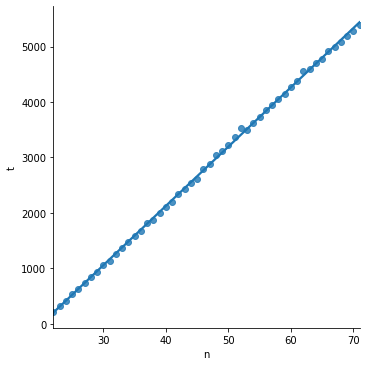

In [6]:
#import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pandas
%matplotlib inline

import seaborn as sns
import pandas as pd

df = pd.DataFrame(results, columns=["n","t"])
sns.lmplot("n", "t", data=df)

